# Accuracy of Attributes

In [236]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Attacking Attributes vs Goalscoring Abilities

In [237]:
RQ3_1 = pd.read_csv(('../../data/analysis/RQ3_1.csv'))
RQ3_1 = RQ3_1.drop('Unnamed: 0', 1)
RQ3_1 = RQ3_1.iloc[1:]

In [238]:
RQ3_1.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
1,Adam Hlousek,Legia Warszawa,Polish Ekstraklasa,71,28,Forward,59,68,54,66,69,58,65,Left,High,2,63,57.0,3.0,0.052632
2,Adam Le Fondre,Bolton Wanderers,English Championship,68,30,Forward,70,56,74,61,62,70,72,Right,High,3,65,34.0,12.0,0.352941
3,Adam Szalai,TSG 1899 Hoffenheim,German Bundesliga,75,29,Forward,74,49,74,83,72,68,75,Right,Medium,3,69,121.0,32.0,0.264463
4,Adama Diakhaby,AS Monaco,French Ligue 1,72,20,Forward,69,68,73,70,74,61,65,Left,High,2,69,25.0,4.0,0.160000
5,Adama Diomande,Hull City,English Championship,69,27,Forward,67,45,68,66,53,64,61,Right,Medium,3,59,22.0,2.0,0.090909


In [239]:
RQ3_1['Attacking Attributes'].corr(RQ3_1['Average Goals/Game'])

0.58071898911509012

In [240]:
attacking_attributes = RQ3_1.groupby(['Attacking Attributes']).mean()['Average Goals/Game']

In [241]:
attacking_attributes = attacking_attributes.to_frame().reset_index()

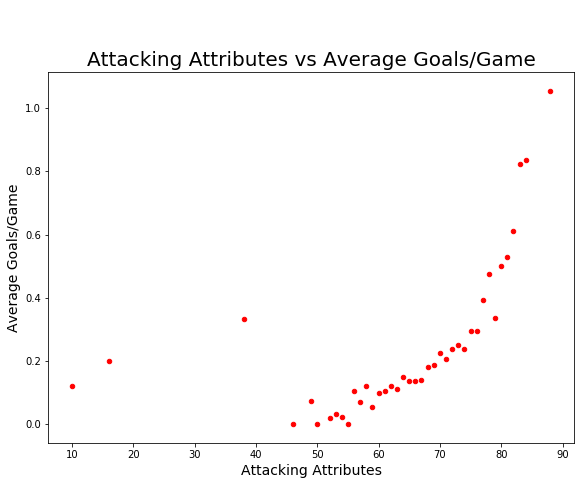

In [242]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Attacking Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Attacking Attributes',size=axis_size)
attacking_attributes.plot(ax=ax0,kind='scatter',x='Attacking Attributes',y='Average Goals/Game',color=color)

#### Lefty vs Righty

In [277]:
RQ3_1_left = RQ3_1[RQ3_1['preferred_foot']=='Left']

In [294]:
RQ3_1_left = RQ3_1_left.sort_values('Average Goals/Game', ascending=False).reset_index().drop('index',1)
RQ3_1_left.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
0,Lionel Messi,FC Barcelona,Spanish Primera Division,93,30,Forward,90,77,95,71,88,85,96,Left,Medium,4,83,168.0,179.0,1.065476
1,Robin van Persie,Fenerbahce SK,Turkish Super Lig,77,33,Forward,79,77,76,75,74,81,79,Left,Medium,3,77,86.0,48.0,0.558140
2,Antoine Griezmann,Atletico Madrid,Spanish Primera Division,88,26,Forward,85,82,88,80,79,87,86,Left,High,3,83,111.0,60.0,0.540541
3,Daniel Sturridge,Liverpool,English Premier League,82,27,Forward,82,62,83,73,74,75,81,Left,Medium,2,73,96.0,47.0,0.489583
4,Romelu Lukaku,Manchester United,English Premier League,86,24,Forward,85,68,89,87,71,76,84,Left,Medium,4,78,178.0,85.0,0.477528


In [ ]:
RQ3_1_right = RQ3_1[RQ3_1['preferred_foot']=='Right']

In [295]:
RQ3_1_right = RQ3_1_right.sort_values('Average Goals/Game', ascending=False).reset_index().drop('index',1)
RQ3_1_right.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
0,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,94,32,Forward,93,85,94,88,83,88,95,Right,High,4,88,164.0,173.0,1.054878
1,Zlatan Ibrahimovic,Manchester United,English Premier League,88,35,Forward,88,76,87,80,84,90,91,Right,Medium,4,83,150.0,130.0,0.866667
2,Luis Suarez,FC Barcelona,Spanish Primera Division,92,30,Forward,90,77,94,77,83,88,83,Right,High,4,84,165.0,138.0,0.836364
3,Robert Lewandowski,FC Bayern Munich,German Bundesliga,91,28,Forward,88,62,91,85,83,87,87,Right,High,4,82,160.0,121.0,0.756250
4,Edinson Cavani,Paris Saint-Germain,French Ligue 1,87,30,Forward,83,70,83,88,78,84,83,Right,High,3,81,167.0,116.0,0.694611


In [291]:
leftyrighty = pd.DataFrame(columns = ['Average Goals/Game','Attacking Attributes'])
leftyrighty.set_value('Right Footed','Average Goals/Game', RQ3_1_right.mean()['Average Goals/Game'])
leftyrighty.set_value('Right Footed','Attacking Attributes', RQ3_1_right.mean()['Attacking Attributes'])
leftyrighty.set_value('Left Footed','Average Goals/Game', RQ3_1_left.mean()['Average Goals/Game'])
leftyrighty.set_value('Left Footed','Attacking Attributes', RQ3_1_left.mean()['Attacking Attributes'])

,Average Goals/Game,Attacking Attributes
Right Footed,0.19883,67.5957
Left Footed,0.192969,68.5663


## Goalkeeping Attributes vs Ability To Keep Clean Sheets

In [250]:
RQ3_3 = pd.read_csv(('../../data/analysis/RQ3_3.csv'))
RQ3_3 = RQ3_3.drop('Unnamed: 0', 1)
RQ3_3 = RQ3_3.iloc[1:]

In [251]:
RQ3_3.head(5)

,Players,club,league,overall,age,Position,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Goalkeeping Attributes,Total Apps,Total Clean Sheets,Average Clean Sheets/Game
1,Alban Lafont,Toulouse FC,French Ligue 1,77,18,Goalkeeper,78,77,71,76,79,76,60.0,18.0,0.300000
2,Albano Bizzarri,Udinese,Italian Serie A,75,39,Goalkeeper,74,76,67,79,72,74,97.0,28.0,0.288660
3,Alex Cordaz,Crotone,Italian Serie A,72,34,Goalkeeper,68,70,62,72,74,69,37.0,4.0,0.108108
4,Alex McCarthy,Southampton,English Premier League,75,27,Goalkeeper,76,73,61,74,78,72,23.0,2.0,0.086957
5,Alexander Schwolow,SC Freiburg,German Bundesliga,75,25,Goalkeeper,75,74,71,69,77,73,36.0,6.0,0.166667


In [252]:
RQ3_3['Goalkeeping Attributes'].corr(RQ3_3['Average Clean Sheets/Game'])

0.59781462730880131

In [253]:
goalkeeping_attributes = RQ3_3.groupby(['Goalkeeping Attributes']).mean()['Average Clean Sheets/Game']

In [254]:
goalkeeping_attributes = goalkeeping_attributes.to_frame().reset_index()

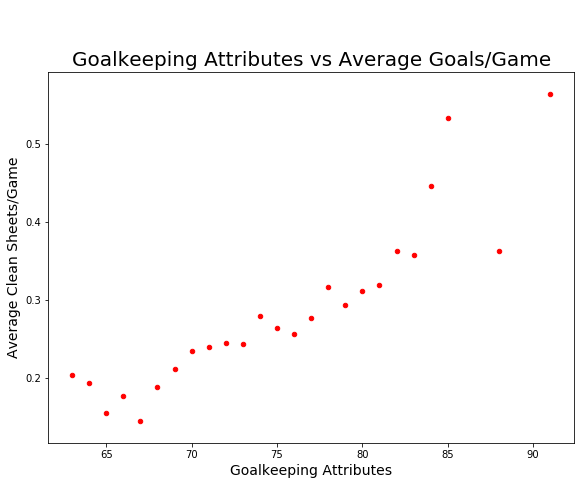

In [255]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Goalkeeping Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Goalkeeping Attributes',size=axis_size)
goalkeeping_attributes.plot(ax=ax0,kind='scatter',x='Goalkeeping Attributes',y='Average Clean Sheets/Game',color=color)

## Defending Attributes vs Ability to Keep Clean Sheets

In [256]:
RQ3_4 = pd.read_csv(('../../data/analysis/RQ3_4.csv'))
RQ3_4 = RQ3_4 .drop('Unnamed: 0', 1)
RQ3_4 = RQ3_4 .iloc[1:]

In [257]:
RQ3_4.head(5)

,Players,club,league,overall,age,Position,Defending Attributes,def,marking,standing_tackle,sliding_tackle,work_rate_def,Total Apps,Total Cards,Average Clean Sheets/Game
1,Aaron Hughes,Heart of Midlothian,Scottish Premiership,71,37,Defender,73,72,75,73,71,Medium,37.0,3.0,0.162162
2,Adam Bodzek,Fortuna Dusseldorf,German 2. Bundesliga,69,31,Defender,69,69,64,74,70,High,29.0,9.0,0.241379
3,Adam Lang,Dijon FCO,French Ligue 1,69,24,Defender,70,71,72,71,67,Medium,19.0,4.0,0.315789
4,Adam Masina,Bologna,Italian Serie A,74,23,Defender,71,71,66,74,74,Medium,65.0,16.0,0.276923
5,Adam Nagy,Bologna,Italian Serie A,74,22,Defender,68,68,68,72,64,High,25.0,4.0,0.240000


In [258]:
RQ3_4['Defending Attributes'].corr(RQ3_4['Average Clean Sheets/Game'])

0.37475354979936915

In [259]:
defending_attributes = RQ3_4.groupby(['Defending Attributes']).mean()['Average Clean Sheets/Game']

In [260]:
defending_attributes = defending_attributes.to_frame().reset_index()

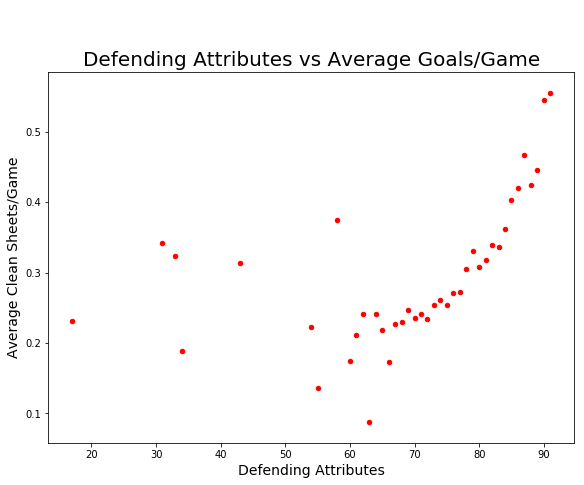

In [261]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Defending Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Defending Attributes',size=axis_size)
defending_attributes.plot(ax=ax0,kind='scatter',x='Defending Attributes',y='Average Clean Sheets/Game',color=color)

## Mental Attributes (eg. Agression) vs Cards

In [262]:
RQ3_5 = pd.read_csv(('../../data/analysis/RQ3_5.csv'))
RQ3_5 = RQ3_5 .drop('Unnamed: 0', 1)
RQ3_5 = RQ3_5 .iloc[1:]

In [263]:
RQ3_5.head(5)

,Players,club,league,overall,age,Position,aggression,work_rate_def,Total Apps,Total Cards,Average Cards/Game
1,Aaron Hughes,Heart of Midlothian,Scottish Premiership,71,37,Defender,66,Medium,37.0,3.0,0.081081
2,Aaron Hunt,Hamburger SV,German Bundesliga,76,30,Midfielder,59,Medium,118.0,11.0,0.093220
3,Aaron Lennon,Everton,English Premier League,77,30,Midfielder,57,Medium,120.0,6.0,0.050000
4,Aaron Niguez,Real Oviedo,Spanish Segunda Division,73,28,Midfielder,55,Low,43.0,10.0,0.232558
5,Aaron Ramsey,Arsenal,English Premier League,82,26,Midfielder,73,High,142.0,21.0,0.147887


In [264]:
aggression = RQ3_5.groupby(['aggression']).mean()['Average Cards/Game']

In [265]:
aggression_corr = aggression.corr(RQ3_5['Average Cards/Game']).round(5).astype(str)

In [266]:
aggression = RQ3_5.groupby(['aggression']).mean()['Average Cards/Game'].to_frame().reset_index()

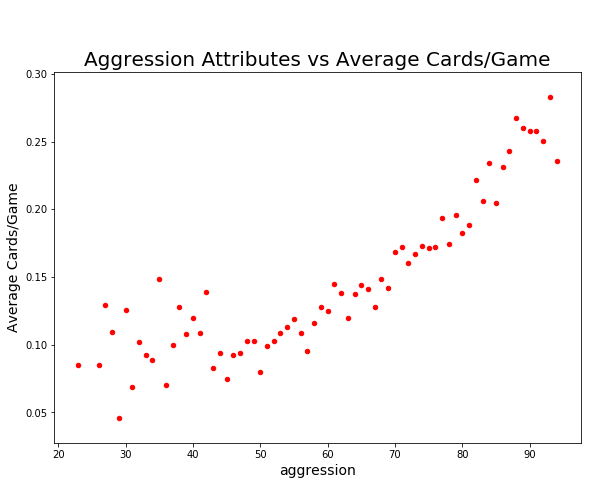

In [267]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Aggression Attributes vs Average Cards/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Cards/Game',size=axis_size)
ax0.set_xlabel('Aggression Attribute',size=axis_size)
aggression.plot(ax=ax0,x='aggression',y='Average Cards/Game',kind='scatter',color=color)


In [268]:
forwards = RQ3_5[RQ3_5['Position'] == 'Forward']
forwards1 = forwards.sort_values('Average Cards/Game', ascending=False).reset_index().drop('index',1).head(50)
workrate1 = forwards.work_rate_def.value_counts()

Text(0.5,1,'Most likely to be carded (Real-life)')

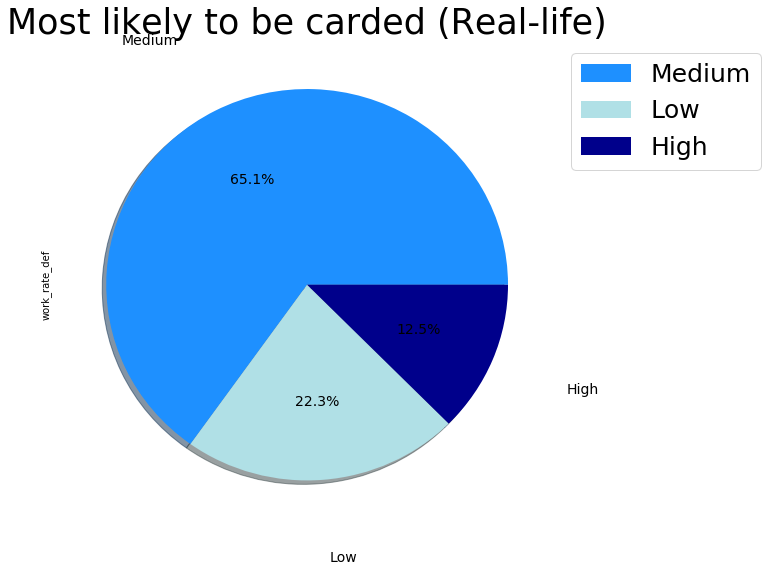

In [269]:
labels = ['','']
workrate1.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,autopct='%1.1f%%',shadow=True,colors=['dodgerblue','powderblue','darkblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=workrate1.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Most likely to be carded (Real-life)',fontsize=35,color='Black')

In [270]:
forwards2 = forwards.sort_values('aggression', ascending=False).reset_index().drop('index',1).head(50)
workrate2 = forwards2.work_rate_def.value_counts()

Text(0.5,1,'Most Aggressive (FIFA)')

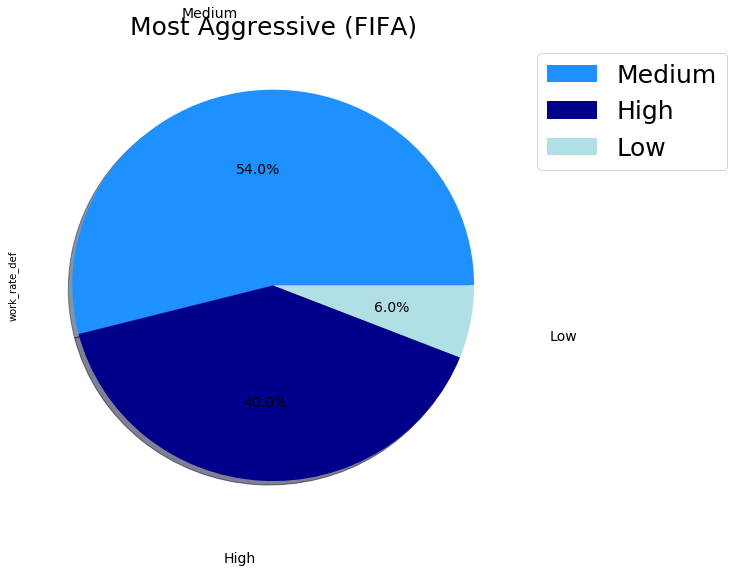

In [271]:
labels = ['','']
workrate2.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,autopct='%1.1f%%',shadow=True,colors=['dodgerblue','darkblue','powderblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=workrate2.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Most Aggressive (FIFA)',fontsize=25,color='Black')